# Citi Bike(New York) Trip Data Analysis
## by Manju Saini

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# One time step -  Unzipping the downloaded files
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# for year in np.arange(2014, 2017):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.zip"
#         with ZipFile(file_name, 'r') as zip:
#             zip.extractall()
#             print('Done!')

# # trip = pd.read_csv("2017-fordgobike-tripdata.csv")


In [3]:
# Merging all dataframes into one, to get data for year 2014
# trip_all = pd.DataFrame()

# for year in np.arange(2014, 2015):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.csv"
# #         print(file_name)
#         if trip_all.empty:
#             trip_all = pd.read_csv(file_name)
#         else:
#             new_df = pd.read_csv(file_name)
# #             trip_all = trip_all.append(new_df, ignore_index=True)
#             print("Before "+file_name+" trip_all.shape: ",trip_all.shape[0], "new_df.shape: ",new_df.shape[0])
#             trip_all = pd.concat([trip_all, new_df], ignore_index=True)
#             print("After "+file_name+" trip_all.shape: ",trip_all.shape[0])
# #         df.head()
#     print("Complete")
    

In [4]:
# Fetching a randam sample of 10000 records only, as the data for whole year is too big for processing
# samples = np.random.choice(trip_all.shape[0], 10000, replace = False)
# trip_samp = trip_all.loc[samples,:]
# trip_samp.to_csv("trip_sample_10000.csv", index=False)

In [5]:
trip = pd.read_csv("trip_sample_10000.csv")

In [6]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null object
stoptime                   10000 non-null object
start station id           10000 non-null int64
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null int64
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null int64
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


In [7]:
trip.dropna(subset=['start station id','end station id', 'bikeid','start station name', 'end station name', 'usertype'], axis=0, inplace=True)

In [8]:
# date type columns to correct format
for d_col in ['starttime', 'stoptime']:
    trip[d_col] = pd.to_datetime(trip[d_col])

In [9]:
trip.sort_values(by='starttime', inplace=True)

In [10]:
# int colums to str type
for int_col in ['start station id', 'end station id', 'bikeid']:
    trip[int_col] = pd.Categorical(trip[int_col], categories = trip[int_col].unique(), ordered=False)

In [11]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null datetime64[ns]
stoptime                   10000 non-null datetime64[ns]
start station id           10000 non-null category
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null category
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null category
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 1.3+ MB


In [12]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [13]:
trip = trip[['tripduration', 'starttime', 'stoptime', 'start station id'
       ,'end station id', 'bikeid', 'usertype','birth year', 'gender','start station name', 'end station name']]

In [14]:
def get_time_of_day(x):
    return x.hour

trip['starttime_hour'] = trip['starttime'].apply(get_time_of_day)
trip['starttime_day_name'] = trip['starttime'].dt.day_name()

trip['starttime_month_name'] = trip['starttime'].dt.month_name()
trip['starttime_date'] = trip['starttime'].dt.date

In [15]:
trip.shape[0]

10000

In [17]:
trip['starttime_day_name'] = pd.Categorical(trip['starttime_day_name'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [18]:
trip['starttime_month_name'] = pd.Categorical(trip['starttime_month_name'], categories=['January','February','March','April','May','June', 'July','August','September','October', 'November','December'], ordered=True)

In [19]:
trip['tripduration_min'] = trip.tripduration/60

In [20]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 16 columns):
tripduration            10000 non-null int64
starttime               10000 non-null datetime64[ns]
stoptime                10000 non-null datetime64[ns]
start station id        10000 non-null category
end station id          10000 non-null category
bikeid                  10000 non-null category
usertype                10000 non-null object
birth year              9708 non-null object
gender                  10000 non-null int64
start station name      10000 non-null object
end station name        10000 non-null object
starttime_hour          10000 non-null int64
starttime_day_name      10000 non-null category
starttime_month_name    10000 non-null category
start_date              10000 non-null object
tripduration_min        10000 non-null float64
dtypes: category(5), datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 1.2+ MB


### What is the structure of your dataset?

> There are 10000, records in the dataset with 16 features. There are 5 categorical features, 2 datetime features, 5 string type features, 3 integer feature and 1 float feature. 

### What is/are the main feature(s) of interest in your dataset?

> I want to find out how number of bike rides are affected by usertype and time of ride. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the time of rides(starttime_hour, starttime_day_name, starttime_month_name) to have a major impact on the number of rides. I expect Customer Usertype to ride less frequently than Subscriber Usertype.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [21]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'end station id', 'bikeid', 'usertype', 'birth year', 'gender',
       'start station name', 'end station name', 'starttime_hour',
       'starttime_day_name', 'starttime_month_name', 'start_date',
       'tripduration_min'],
      dtype='object')

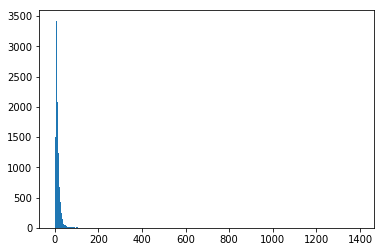

In [22]:
bins = np.arange(0, 1400, 5)

plt.hist(data=trip, x='tripduration_min', bins=bins);

Most of the data is set to the far left, suggesting some strong outliers on the right.Lets identify these outliers and see if they need to be filtered out of the data.

In [23]:
duration_df = trip.query('tripduration_min > 100')[['starttime', 'stoptime','tripduration_min','tripduration']]
duration_df['stoptime'].sub(duration_df['starttime'])/ np.timedelta64(1, 'm') - duration_df['tripduration_min']

8498    0.0
8733    0.0
8773    0.0
1048    0.0
7687    0.0
9724    0.0
3894    0.0
7888    0.0
9074    0.0
6467    0.0
5892    0.0
5094    0.0
1821    0.0
6974    0.0
1684    0.0
1116    0.0
4251    0.0
7058    0.0
1108    0.0
6793    0.0
6755    0.0
4818    0.0
2955    0.0
4472    0.0
3763    0.0
7950    0.0
3172    0.0
1573    0.0
3730    0.0
8906    0.0
6684    0.0
5538    0.0
9655    0.0
2044    0.0
2858    0.0
8470    0.0
1787    0.0
2145    0.0
6724    0.0
4383    0.0
3685    0.0
3423    0.0
2200    0.0
5703    0.0
6281    0.0
dtype: float64

In [53]:
duration_df['tripduration_hour'] = duration_df['tripduration_min']/60

In [54]:
duration_df

,starttime,stoptime,tripduration_min,tripduration,tripduration_hour
8498,2014-01-17 12:39:24,2014-01-17 17:02:40,263.266667,15796,4.387778
8733,2014-01-25 12:52:26,2014-01-25 17:52:23,299.950000,17997,4.999167
8773,2014-02-10 11:39:03,2014-02-10 13:23:53,104.833333,6290,1.747222
1048,2014-02-11 19:45:28,2014-02-12 18:59:06,1393.633333,83618,23.227222
7687,2014-03-31 09:06:30,2014-03-31 10:52:15,105.750000,6345,1.762500
9724,2014-04-13 11:06:47,2014-04-13 13:56:24,169.616667,10177,2.826944
3894,2014-04-28 14:08:39,2014-04-28 18:05:57,237.300000,14238,3.955000
7888,2014-05-17 14:01:28,2014-05-17 16:44:37,163.150000,9789,2.719167
9074,2014-05-20 10:52:37,2014-05-20 13:53:52,181.250000,10875,3.020833
6467,2014-05-30 16:26:13,2014-05-30 18:50:43,144.500000,8670,2.408333


All the high outliers appear to be valid points.Some outliers have extremely high values of 5 to 23 hours, this can be due some system error , or some other issue. Removing these outlier for consistency.

In [24]:
# remove outlier values.
trip = trip.query('tripduration_min < 100')
trip.shape[0]

9955

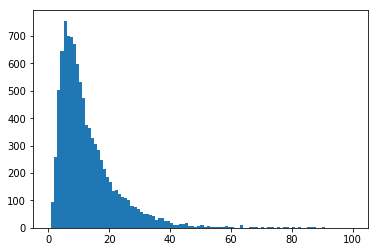

In [25]:
bin_size = 1
bins = np.arange(0, 100+bin_size, bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins);

Text(0.5, 0, 'trip duration (min)')

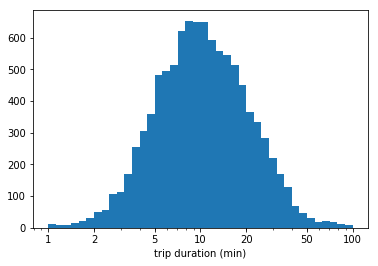

In [55]:
# tripduration_min has a long tail on the right, putting it on log scale

log_bin_size = 0.05
bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5,10,20,50,100]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('trip duration (min)')

tripduration_min has a long-tailed distribution, with 45 trips having trip duration more than 100 mins and rest of the 9955 trips having trip duration less than 100 mins. When plotted on a log-scale, the price distribution looks unimodal, with peak between 5 and 20.

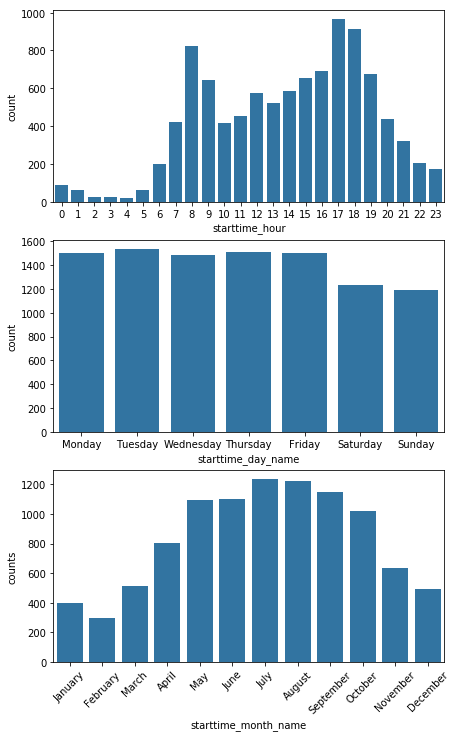

In [27]:
fig, ax = plt.subplots(nrows=3, figsize = [7,12])
base_color = sb.color_palette()[0]

cat_var = ['starttime_hour','starttime_day_name', 'starttime_month_name']
for n in np.arange(0, len(cat_var)):
    col = cat_var[n]
    sb.countplot(data=trip, x=col, color=base_color, ax = ax[n]);
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('counts')
    

Text(0.5, 0, 'Percentage of Rides')

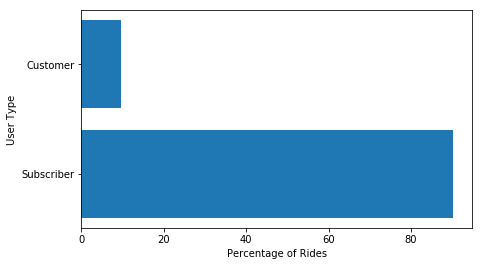

In [28]:
plt.figure(figsize=[7,4])

user_df = round(trip['usertype'].value_counts()*100/trip.shape[0], 1).reset_index().rename(columns={'index':'usertype', 'usertype':'percentage_rides'})
plt.barh(user_df['usertype'], user_df['percentage_rides'], color=base_color);
plt.ylabel('User Type')
plt.xlabel('Percentage of Rides')

In [29]:
user_df.set_index('usertype')

,percentage_rides
usertype,
Subscriber,90.3
Customer,9.7


#### Days of week - Most of the trips are made in weekdays(Monday-Friday), this can be because of these days are working days. Also there is not a very huge difference between weekdays and weekends, which mean people are riding even on weekends. We will investigate this further.

#### Month of year - Months from May to October have the most rides, with Feburary being the lowest.This can be attributed to temperature being lowest in February.

#### Time of Day -  The plot is majorly bimodal, with peaks between 8 - 10 hours, 15 - 20 hours and small peak at 12 hours. People are riding while travelling  to office and back to home but a small peak at 12 hours . We will investigate this further.

#### User type - 90.3% of the rides are taken by Subscribers and 9.7% by Customers. Thats a huge difference.

Next, I will analyze Number of rides starting from each station and ending to each station

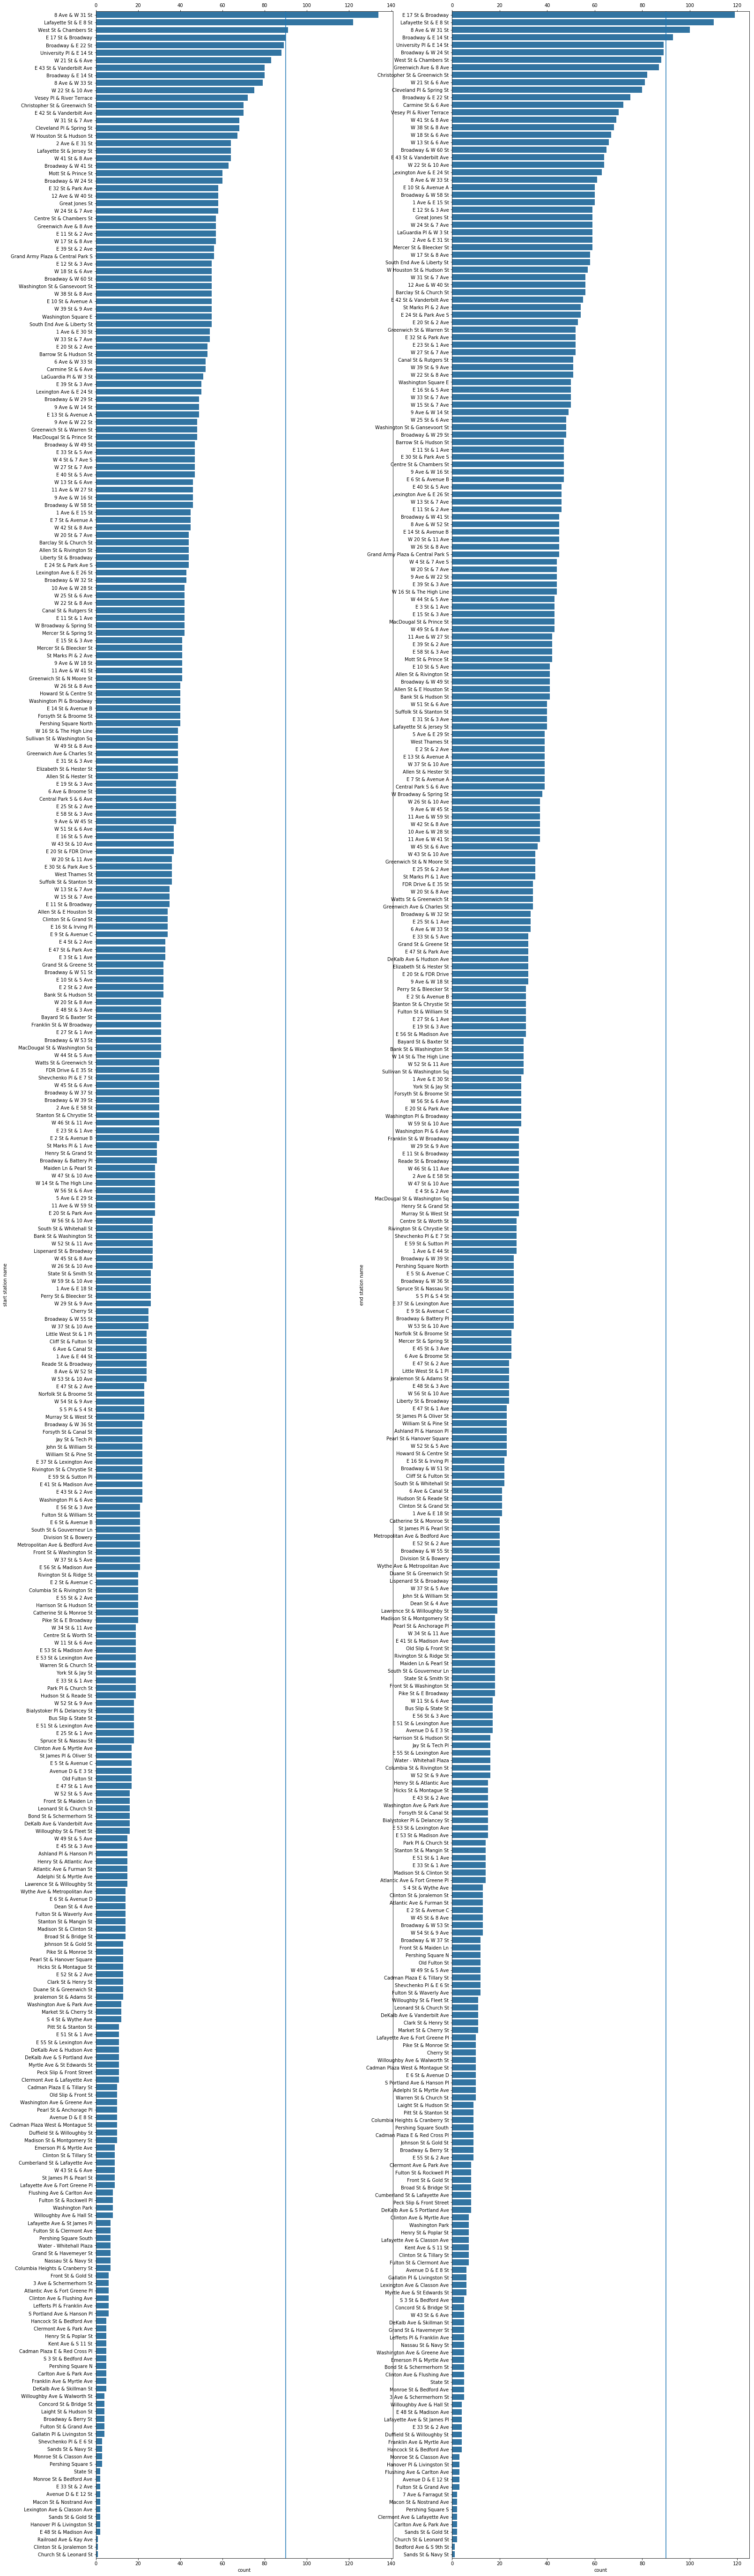

In [30]:
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station name'
start_station_order = trip['start station name'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=start_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.subplot(1,2,2)
col = 'end station name'
end_station_order = trip['end station name'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=end_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

#### Start Station which has most number of outgoing rides is not the one having most number of incoming rides. Now, lets find out the stations with most number of incoming and outgoing rides (maximum traffic) and least number of incoming and outgoing rides (minimum traffic).. 

In [31]:
starting_rides = trip.groupby('start station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'start station bike count'})

In [32]:
ending_rides = trip.groupby('end station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'end station bike count'})

In [33]:
bikes_count_df = pd.merge(left=starting_rides, right=ending_rides, how='outer', left_on='start station name', right_on='end station name')
bikes_count_df.dropna(subset=['start station name'], inplace=True, axis=0)
bikes_count_df['end station bike count'].fillna(0, inplace=True)
bikes_count_df['total_bike_count'] = bikes_count_df['start station bike count'] + bikes_count_df['end station bike count']
bikes_count_df.sort_values('total_bike_count', ascending=True, inplace=True)

In [34]:
bikes_count_df.columns

Index(['start station name', 'start station bike count', 'end station name',
       'end station bike count', 'total_bike_count'],
      dtype='object')

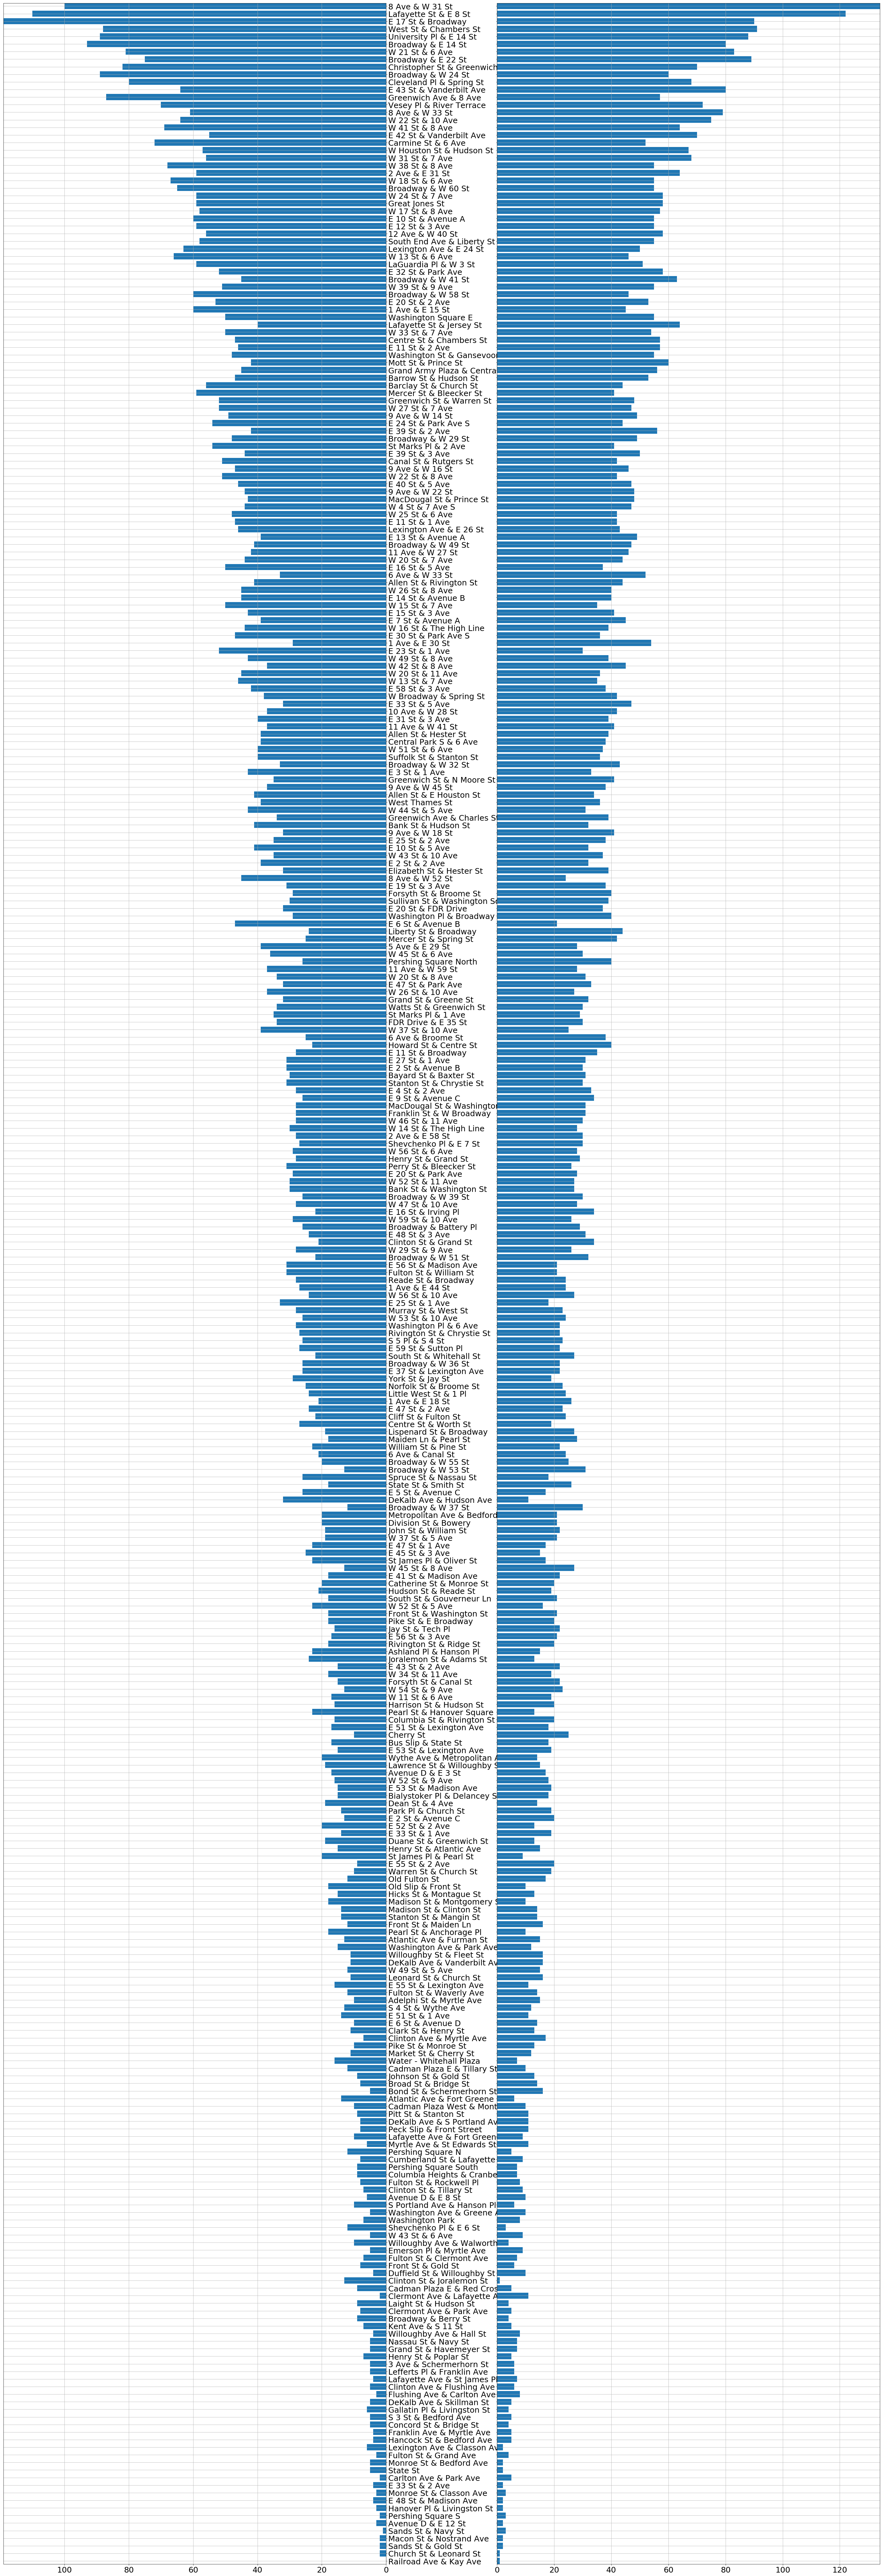

In [35]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[50, 150])
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
y = np.arange(bikes_count_df['start station name'].shape[0])
axes[0].barh(y, bikes_count_df['end station bike count'])
axes[1].barh(y, bikes_count_df['start station bike count'])
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=bikes_count_df['start station name'])
axes[0].yaxis.tick_right()

for ax in axes:
    ax.tick_params(labelsize=25)
    
fig.subplots_adjust(wspace=0.29)

for ax in axes.flat:
    ax.margins(0)
    ax.grid(True)

# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

In [56]:
bikes_count_df.tail(10).sort_values('total_bike_count', ascending=False)[['start station name','start station bike count','end station bike count']].set_index('start station name')

,start station bike count,end station bike count
start station name,,
8 Ave & W 31 St,134.0,100.0
Lafayette St & E 8 St,122.0,110.0
E 17 St & Broadway,90.0,119.0
West St & Chambers St,91.0,88.0
University Pl & E 14 St,88.0,89.0
Broadway & E 14 St,80.0,93.0
Broadway & E 22 St,89.0,75.0
W 21 St & 6 Ave,83.0,81.0
Christopher St & Greenwich St,70.0,82.0


#### Top 10 Stations with maximum traffic are - '8 Ave & W 31 St', 'Lafayette St & E 8 St', 'E 17 St & Broadway','West St & Chambers St', 'University Pl & E 14 St','Broadway & E 14 St', 'Broadway & E 22 St', 'W 21 St & 6 Ave', 'Christopher St & Greenwich St', 'Broadway & W 24 St'

In [36]:
bikes_count_df.head(10)[['start station name','start station bike count','end station bike count']].set_index('start station name')

,start station bike count,end station bike count
start station name,,
Railroad Ave & Kay Ave,1.0,0.0
Church St & Leonard St,1.0,2.0
Sands St & Gold St,2.0,2.0
Macon St & Nostrand Ave,2.0,2.0
Sands St & Navy St,3.0,1.0
Avenue D & E 12 St,2.0,3.0
Pershing Square S,3.0,2.0
Hanover Pl & Livingston St,2.0,3.0
E 48 St & Madison Ave,2.0,4.0


#### 10 Stations with least traffic are - 'Railroad Ave & Kay Ave', 'Church St & Leonard St', 'Sands St & Navy St', 'Macon St & Nostrand Ave', 'Sands St & Gold St', 'Hanover Pl & Livingston St', 'Pershing Square S', 'Avenue D & E 12 St', 'Monroe St & Classon Ave', 'E 33 St & 2 Ave'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> tripduration_min has a long-tailed distribution. When plotted on a log-scale, the price distribution looks unimodal, with peak between 5 and 20. Few datapoint with unusually high trip duration were removed from dataset.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> tripduration_min was right skewed. 

Difference between total rides taken on a weekend and total rides on a weekday is not too huge. We will investigate this further.

Month of year - Months from May to October have the most rides, with Feburary being the lowest.This can be attributed to temperature being lowest in February.

Time of Day -  The plot is majorly bimodal, with peaks between 8 - 10 hours, 15 - 20 hours and small peak at 12 hours. People are riding while travelling  to office and back to home but a small peak at 12 hours . We will investigate this further.

User type - 90.3% of the rides are taken by Subscribers and 9.7% by Customers. Thats a huge difference.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [38]:
# trip = trip[['start station id','end station id','usertype','starttime_hour', 'starttime_day_name', 'starttime_month_name', 'tripduration_min','start station name', 'end station name','starttime']]

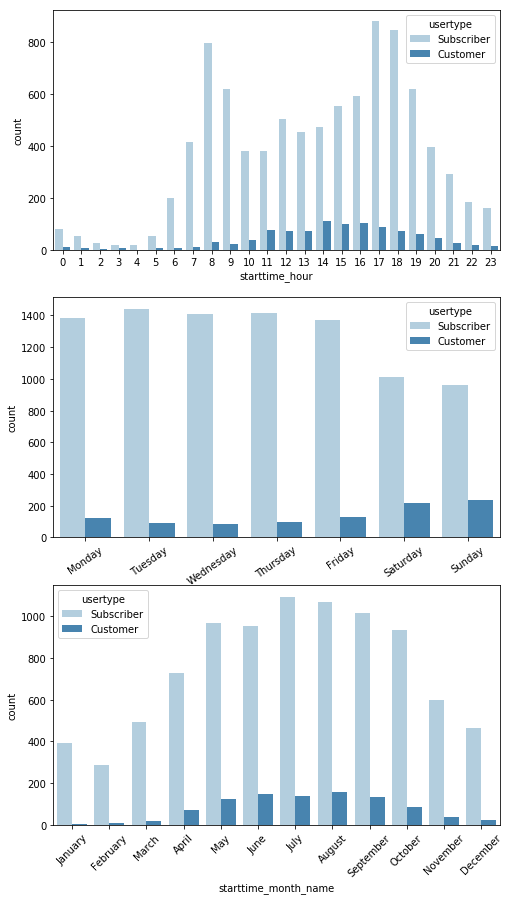

In [39]:
plt.figure(figsize = [8, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = trip, x = 'starttime_hour', hue = 'usertype', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = trip, x = 'starttime_day_name', hue = 'usertype', palette = 'Blues')
# ax.legend(ncol = 1) # re-arrange legend to reduce overlapping
plt.xticks(rotation=35)

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = trip, x = 'starttime_month_name', hue = 'usertype', palette = 'Blues')
# ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=45)

plt.show()

Time of Day- plot for rides by subscriber usertype is bimodal with high counts, however plot for rides by customer usertype is unimodal.

Day of week - rides by Subscribers reduce on weekends(Saturday and Sunday) , however rides for Customer increases on weekends(Saturday and Sunday) but still rides by Subsciber on weekends is greater than by Customer.

Month of year - plot for number of rides by both - subscriber and customer, are unimodal with most of the rides between May and October

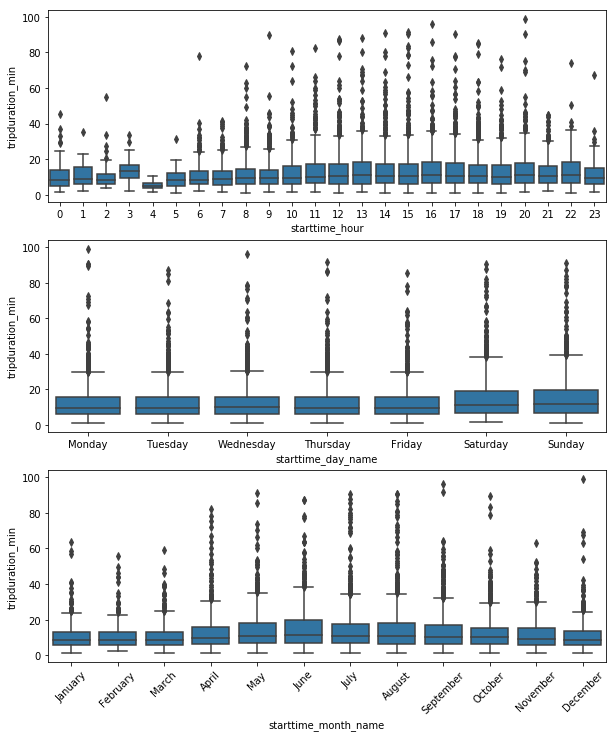

In [40]:
# 'start station id','end station id', 'usertype','starttime_hour', 'starttime_day_name', 'starttime_month_name', 'tripduration_min'
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,12])
categoric_vars = ['starttime_hour','starttime_day_name','starttime_month_name']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data=trip, x=var, y='tripduration_min', color=base_color, ax = ax[i])
    plt.xticks(rotation=45)

Plotting 'starttime_hour','starttime_day_name','starttime_month_name' and log_tripduration_min 

In [41]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

trip['log_tripduration_min'] = trip['tripduration_min'].apply(log_trans)

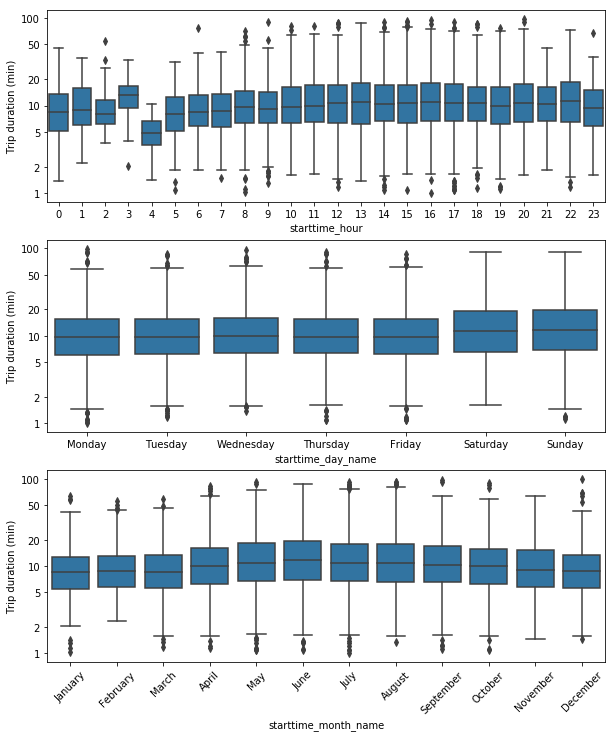

In [42]:
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,12])
categoric_vars = ['starttime_hour','starttime_day_name','starttime_month_name']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data=trip, x=var, y='log_tripduration_min', color=base_color, ax = ax[i])
    y_ticks = [1,2,5,10,20,50,100]
    ax[i].set_yticks(log_trans(np.array(y_ticks)))
    ax[i].set_yticklabels(y_ticks)
    ax[i].set_ylabel("Trip duration (min)")
    plt.xticks(rotation=45)

Text(0.5, 0, 'Trip duration (min)')

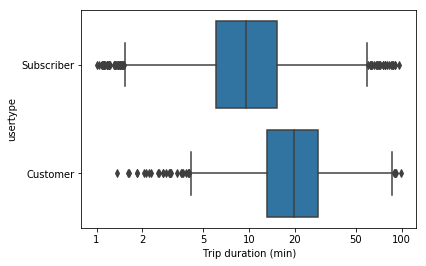

In [43]:
var = 'usertype'
sb.boxplot(data=trip, y=var, x='log_tripduration_min', color=base_color)
x_ticks = [1,2,5,10,20,50,100]
plt.xticks(log_trans(np.array(x_ticks)),x_ticks);
plt.xlabel('Trip duration (min)')


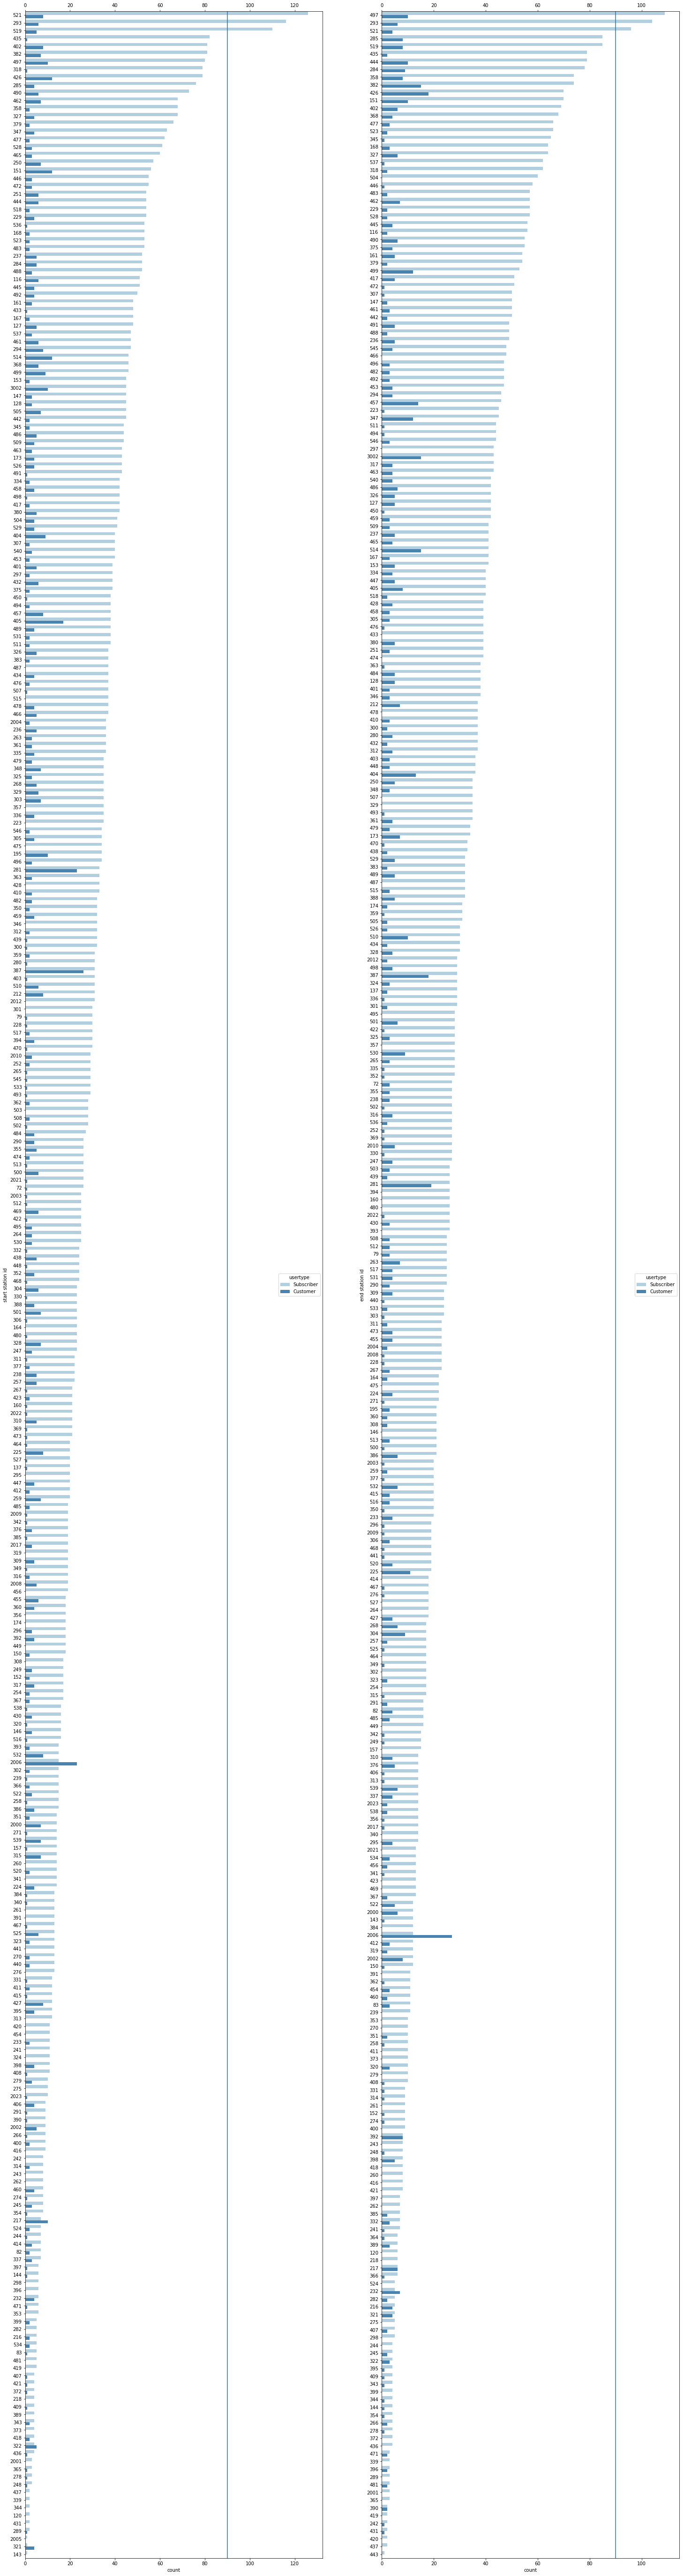

In [44]:
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station id'
# start_station_order = trip['start station id'][''].value_counts().index
start_station_order = trip[trip['usertype']=='Subscriber']['start station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=start_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.subplot(1,2,2)
col = 'end station id'
end_station_order = trip[trip['usertype']=='Subscriber']['end station id'].value_counts().index
# end_station_order = trip['end station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=end_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

Stations having higher Subsriber traffic does not have higher customer traffic. Subscriber traffic and Customer traffic are independent of each other.Some stations even have zero traffic.Analysing these two plots on same y scale can give a better understanding of overall traffic for a particular station.todo

In [45]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='starttime_month_name', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [46]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='starttime_day_name', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [47]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='starttime_hour', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [48]:
# log_bin_size = 0.05
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='starttime_hour', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')


In [49]:
# sb.distplot(trip['tripduration_min'])

Trip duration Vs Month -  Trip duration is longer for months from April to October. 

Trip duration Vs Day of Week - Trip duration is longer on Saturday and Sundays. univariate analysis, less number of trips were taken on Saturday Sunday. Combining the two analysis, more number of short trips are taken on weekdays, and more number of long trips are taken on Weekends

Trip duration Vs Time of Day - Surprisingly Trip duration is maximum at 3 hours and plunges to minimum at 4 hours. This is an area to be investigated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [50]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'end station id', 'bikeid', 'usertype', 'birth year', 'gender',
       'start station name', 'end station name', 'starttime_hour',
       'starttime_day_name', 'starttime_month_name', 'start_date',
       'tripduration_min', 'log_tripduration_min'],
      dtype='object')

C:\Users\manju.saini\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the catplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: object of type 'NoneType' has no len()

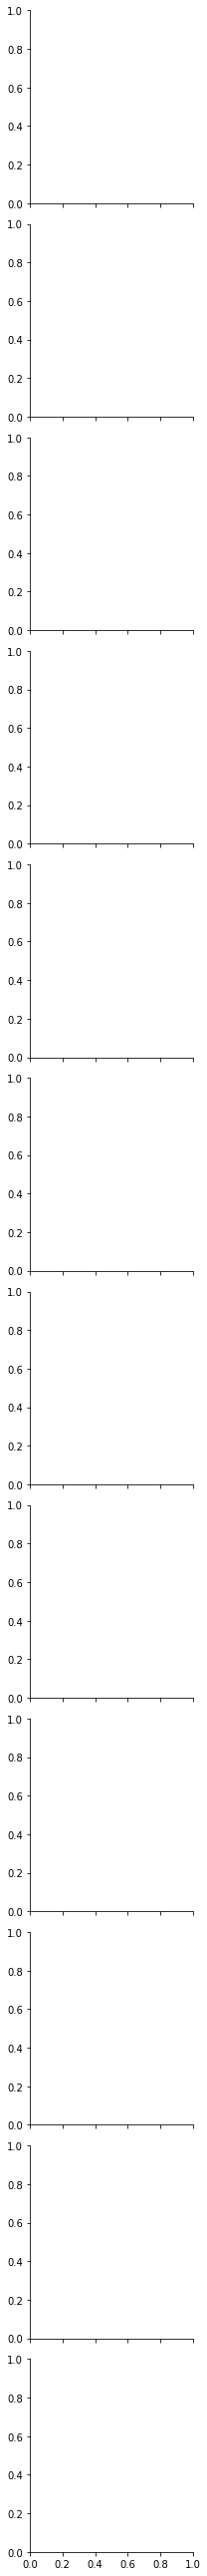

In [51]:
log_bin_size = 0.05
# plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
g=sb.FacetGrid(data=trip, row='starttime_month_name', hue='usertype',sharey=True, margin_titles=True)
# g.map(sb.countplot,'starttime_date');
g.map(sb.catplot,'starttime_date','log_tripduration_min');
# g.map(sb.countplot,'tripduration_min');
# plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [ ]:
# plt.hist(data=trip, x='tripduration_min', hue)
# plt.figure(figsize=[8,50])
# sb.pointplot(data=trip, x='starttime_date', y='tripduration', linestyles='', scatter_kws={'alpha':0.05}, errwidth=0)
fig, ax = plt.subplots(ncols = 1, nrows = 1 , figsize = [20,10])
sb.catplot(data=trip, x='starttime_date', y='log_tripduration_min', color=base_color, ax = ax, jitter=True, hue="usertype", palette="viridis_r");#, hue="usertype",alpha=1/5,
y_ticks = [1,2,5,10,20,50,100]
ax.set_yticks(log_trans(np.array(y_ticks)))
ax.set_yticklabels(y_ticks)
# ax.set_ylabel("Trip duration (min)")
# ax.set_xticks(trip['starttime_date'].tolist())
ax.set_xticklabels()
plt.xticks(rotation=90)
# , fit_reg=False, , x_jitter=0.04,x_jitter=0.04,

In [ ]:
# fig, ax = plt.subplots(ncols = 1, nrows = 1 , figsize = [20,10])
# x_val = np.arange(trip.shape[0])
# sb.catplot(data=trip, x=x_val, y='log_tripduration_min', color=base_color, ax = ax, jitter=True, hue="usertype", palette="viridis_r");#, hue="usertype",alpha=1/5,
# y_ticks = [1,2,5,10,20,50,100]
# ax.set_yticks(log_trans(np.array(y_ticks)))
# ax.set_yticklabels(y_ticks)
# ax.set_ylabel("Trip duration (min)")
# plt.xticks(rotation=90)

In [ ]:
# Date Vs total rides count

# trip.groupby('starttime_date').agg({'bikeid':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.figure(figsize=[20,10])
date_usertype_df= trip.groupby(['starttime_date','usertype']).agg({'bikeid':'count'}).reset_index()

ax = sb.pointplot(x='starttime_date', y='bikeid', hue='usertype', palette='viridis_r', scale=.5, data=date_usertype_df)
# .plot(kind='bar', color='blue',figsize=(20,10))

# .query('usertype == "Subscriber"')
# trip.query('usertype == "Customer"').groupby('starttime_date').agg({'bikeid':'count'}).plot(kind='line', color='green')

In [ ]:
# Month Vs total rides count
plt.figure(figsize=[15,7])
month_usertype_df= trip.groupby(['starttime_month_name','usertype']).agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid':'count'})

ax = sb.pointplot(x='starttime_month_name', y='count', hue='usertype', palette='viridis_r', scale=.7, data=month_usertype_df)

In [ ]:
# g = sb.FacetGrid(data = trip, col = 'starttime_month_name', col_wrap = 4, size = 3)# xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)]
# g.map(sb.hist2dgrid, 'starttime_hour', 'tripduration_min', color = 'inferno_r')
# # g.set_xlabels('Carat')
# # g.set_ylabels('Price ($)')

# trip.groupby('starttime').plot()

In [ ]:
trip.columns

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!